In [62]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import datetime
dateparse = lambda dates : datetime.strptime(dates, '%Y-%m-%d')

data = pd.read_csv('daily-min-temperatures.csv', index_col=0, parse_dates=['Date'], date_parser=dateparse)
data.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [63]:
data.describe()

,Temp,MA
count,3650.000000,3286.000000
mean,11.177753,11.113399
std,4.071837,0.407433
min,0.000000,10.463562
25%,8.300000,10.777397
50%,11.000000,11.052055
75%,14.000000,11.347603
max,26.300000,12.201918


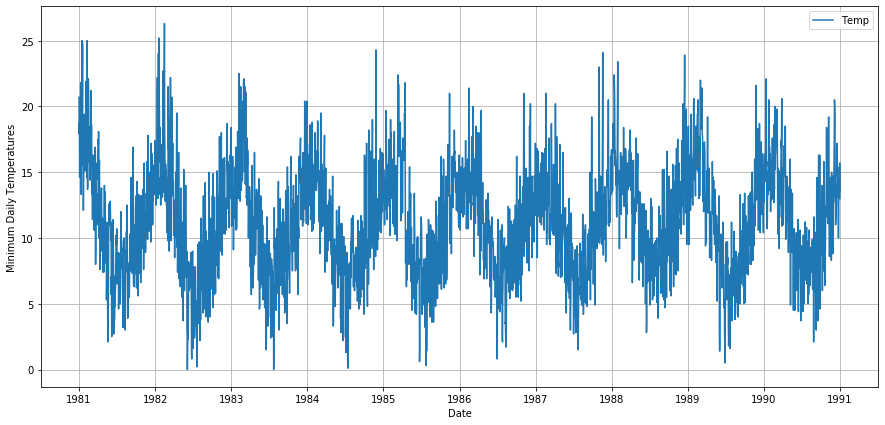

In [3]:
plt.figure(figsize=[15,7])
plt.grid(True)
plt.plot(data, label='Temp')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Minimum Daily Temperatures')
plt.legend(loc='best')
plt.show()

Data trong Time series có chứa giá trị âm và 0, không nên sử dụng mô hình Multiplicative 

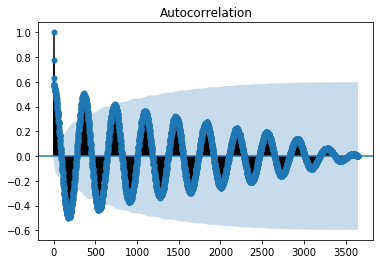

In [65]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Temp'], fft=False, lags=len(data)-1)
plt.show()

In [5]:
data['MA'] = data['Temp'].rolling(window=365).mean()

Text(0, 0.5, 'Minimum Daily Temperatures')

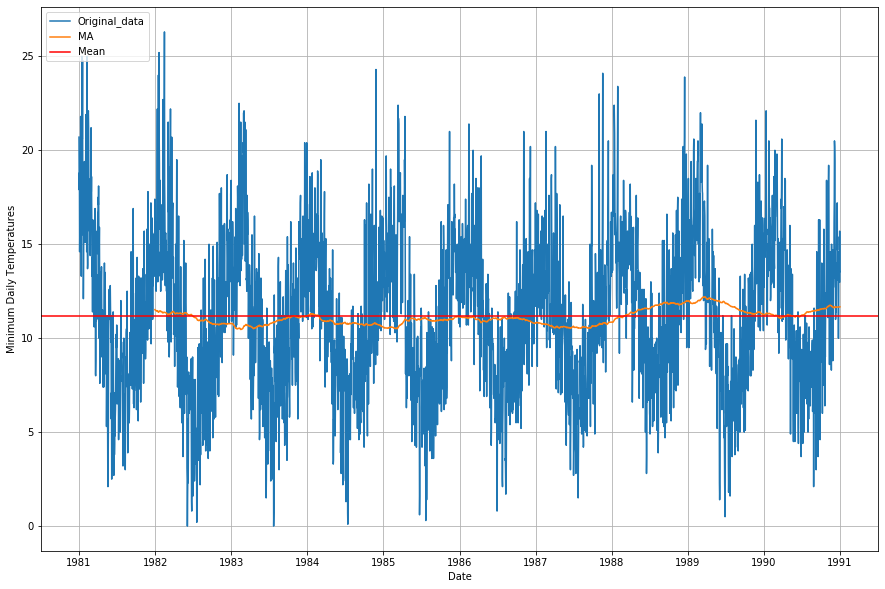

In [6]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(data['Temp'], label='Original_data')
plt.plot(data['MA'], label='MA')
plt.axhline(data['Temp'].mean(), label='Mean', color ='r')
plt.legend(loc=2)
plt.xlabel('Date')
plt.ylabel('Minimum Daily Temperatures')

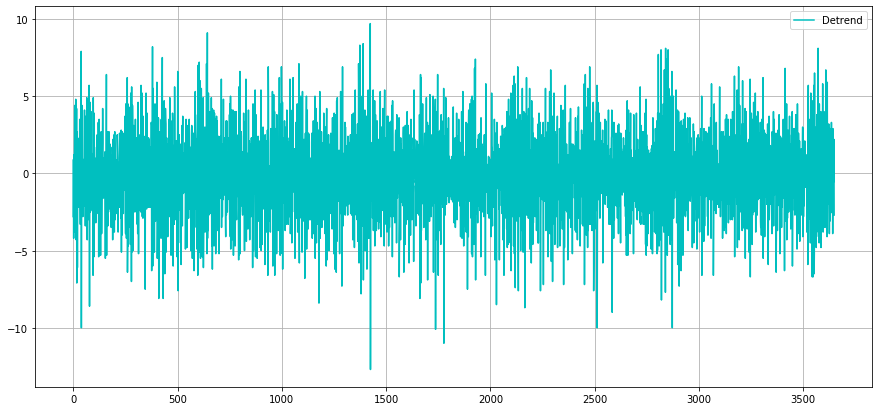

In [13]:
#Detrend by differencing
X = data['Temp']
diff = []
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)

plt.figure(figsize=[15,7])
plt.grid(True)
plt.plot(diff,label='Detrend', color='c')
plt.legend(loc='best')
plt.show()

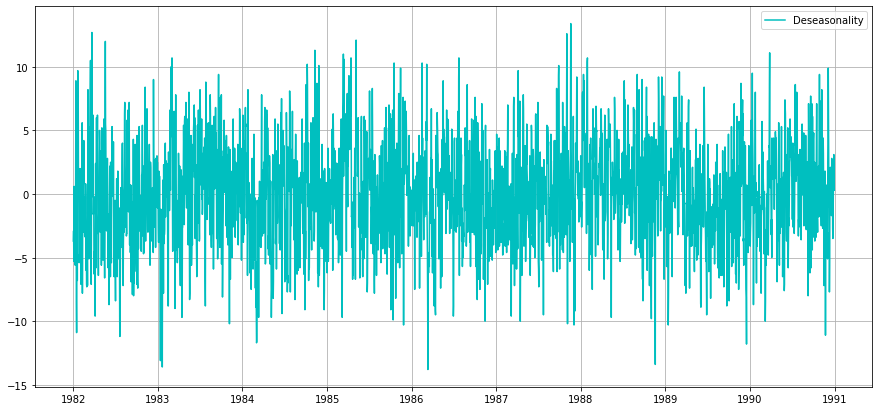

In [28]:
# seasonal difference
X = data['Temp']
differenced = X.diff(365)
# trim off the first year of empty data
#differenced = differenced[365:]

plt.figure(figsize=[15,7])
plt.grid(True)
plt.plot(differenced,label='Deseasonality', color='c')
plt.legend(loc='best')
plt.show()

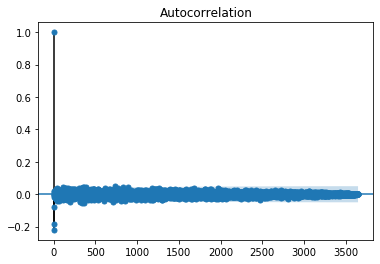

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff, fft=False, lags=len(diff)-1)
plt.show()

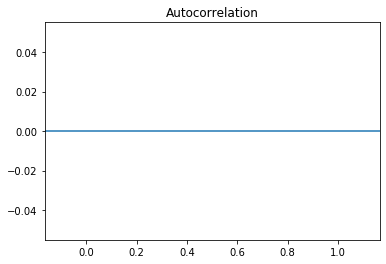

In [30]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(differenced, fft=False)
plt.show()

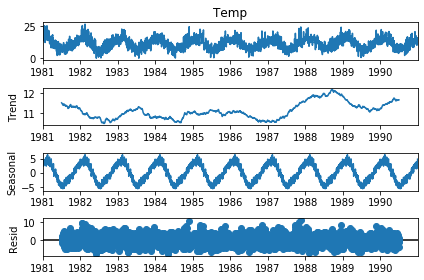

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
import  statsmodels.api as sm

decomp_add_data = sm.tsa.seasonal_decompose(data['Temp'], model="additive", period=365)
decomp_add_data.plot()
plt.show()

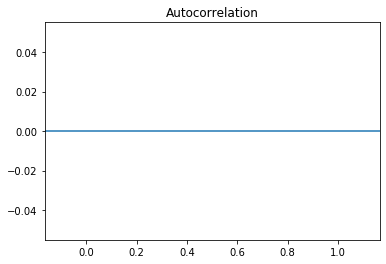

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(decomp_add_data.resid, fft=False)
plt.show()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import  statsmodels.api as sm

decomp_mul_data = sm.tsa.seasonal_decompose(data['Temp'], model="multiplicative", period=365)
decomp_mul_data.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [51]:
test_size_list = [30, 90, 180, 365]

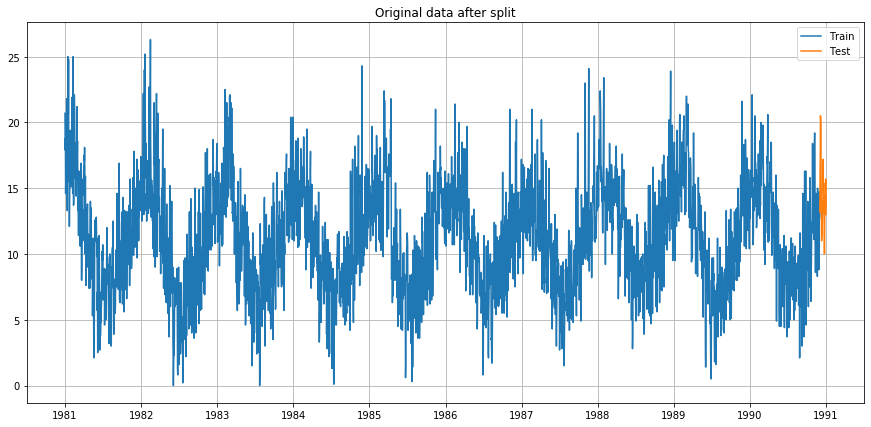

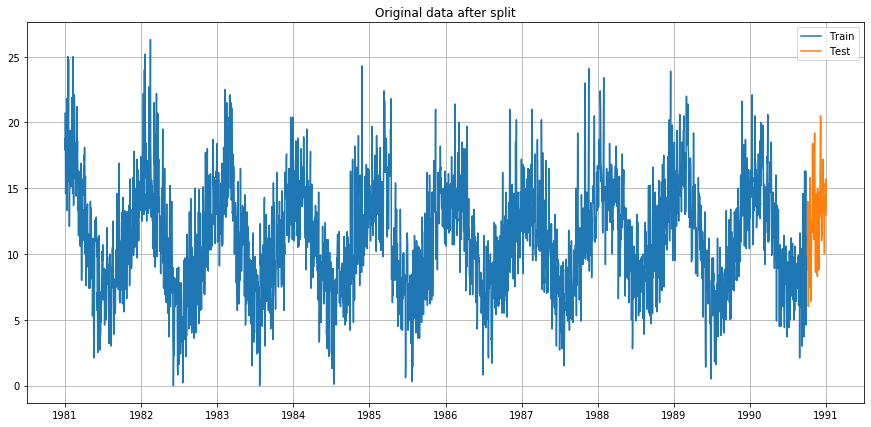

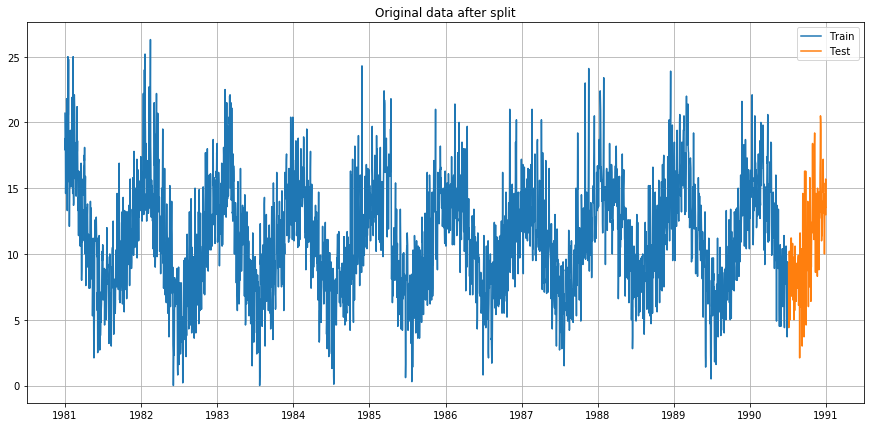

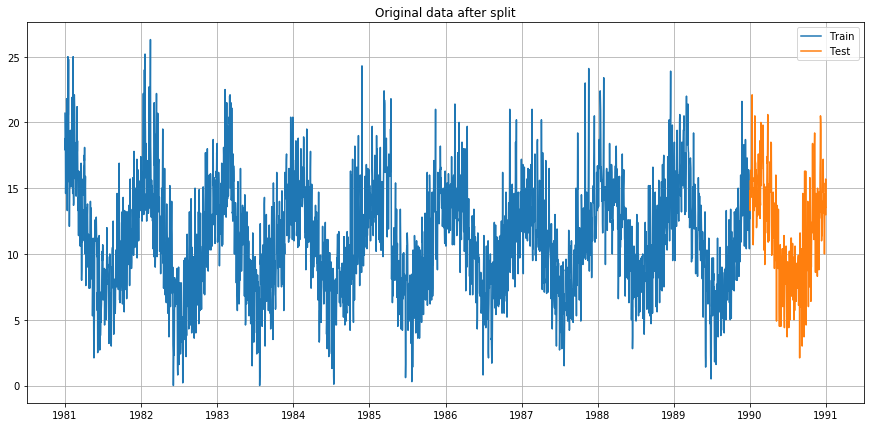

In [52]:
for test_size in test_size_list:
    train = data[0:len(data)-test_size] 
    test= data[len(data)-test_size:]


    plt.figure(figsize=[15,7])
    plt.grid(True)

    plt.plot(train.index, train.Temp, label = 'Train')
    plt.plot(test.index, test.Temp,  label = 'Test')
    plt.legend(loc = 'best')
    plt.title('Original data after split')
    plt.show()

In [54]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

test_size = 30
train = data[0:len(data)-test_size] 
test= data[len(data)-test_size:]
    
pred1 = ExponentialSmoothing(np.asarray(train['Temp']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 365).fit() #[:'2017-01-01']
print('')
print('== Holt-Winters Additive ==')
print('')
alpha_value = np.round(pred1.params['smoothing_level'], 4)
print('Smoothing Level (Alpha): ', alpha_value)
print('Smoothing Slope (Beta): ', np.round(pred1.params['smoothing_slope'], 4))
print('Smoothing Seasonal (Gamma): ', np.round(pred1.params['smoothing_seasonal'], 4))
# print('Initial Level: ', np.round(pred1.params['initial_level'], 4))
# print('Initial Slope: ', np.round(pred1.params['initial_slope'], 4))
# print('Initial Seasons: ', np.round(pred1.params['initial_seasons'], 4))


== Holt-Winters Additive ==

Smoothing Level (Alpha):  0.3948
Smoothing Slope (Beta):  0.0001
Smoothing Seasonal (Gamma):  0.0


C:\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [55]:
### Forecast for next 32 date
y_pred1 =  pred1.forecast(steps = test_size)
df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Temp']})
print(df_pred1)

                Y_hat     Y
Date                       
1990-12-02  12.850901  13.2
1990-12-03  13.368552  16.2
1990-12-04  12.703027  17.3
1990-12-05  12.842200  20.5
1990-12-06  13.785220  20.2
1990-12-07  14.329348  19.4
1990-12-08  12.304967  15.5
1990-12-09  13.143186  14.1
1990-12-10  13.862507  11.0
1990-12-11  14.191721  11.1
1990-12-12  13.751773  14.0
1990-12-13  13.418995  11.4
1990-12-14  12.818572  12.5
1990-12-15  13.714744  13.4
1990-12-16  14.632929  13.6
1990-12-17  14.721492  13.9
1990-12-18  14.311319  17.2
1990-12-19  13.434891  14.7
1990-12-20  13.216138  15.4
1990-12-21  13.207606  13.1
1990-12-22  13.054615  13.2
1990-12-23  13.379435  13.9
1990-12-24  14.561165  10.0
1990-12-25  15.534871  12.9
1990-12-26  15.098008  14.6
1990-12-27  14.655495  14.0
1990-12-28  14.447105  13.6
1990-12-29  15.504741  13.5
1990-12-30  17.620663  15.7
1990-12-31  18.611674  13.0


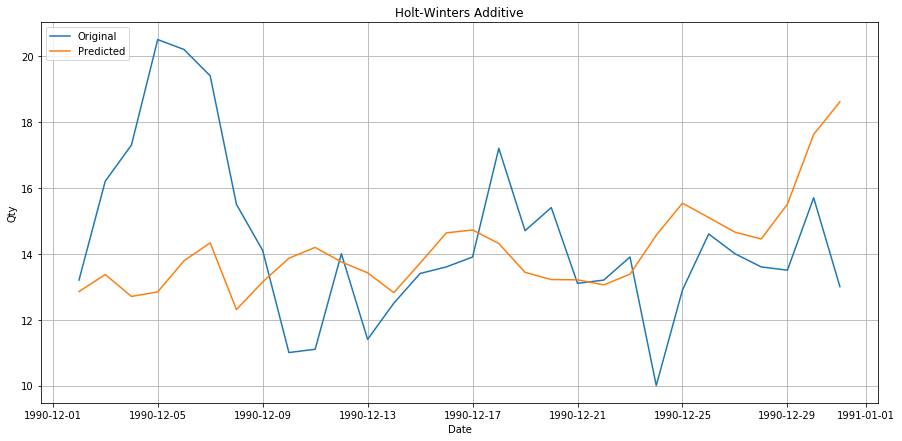

In [56]:
plt.figure(figsize=[15,7])
plt.grid(True)
plt.plot(df_pred1.Y, label='Original')
plt.plot(df_pred1.Y_hat, label='Predicted')

plt.legend(loc='upper left')
plt.title('Holt-Winters Additive')
plt.ylabel('Qty')
plt.xlabel('Date')
plt.show()

In [57]:
def MSE(Y_true,Y_pred): 
    Y_true, Y_pred = np.array(Y_true), np.array(Y_pred)
    return np.mean(np.square(Y_pred - Y_true))

def MAE(Y_true,Y_pred): 
    Y_true, Y_pred = np.array(Y_true), np.array(Y_pred)
    return np.mean(np.abs(Y_pred - Y_true))


def MAPE(Y_true, Y_pred): 
    Y_true, Y_pred = np.array(Y_true), np.array(Y_pred)
    return np.mean(np.abs(Y_pred - Y_true)/Y_true) * 100

In [58]:
rmse = np.sqrt(MAPE(df_pred1.Y, df_pred1.Y_hat))
mae = MAE(df_pred1.Y, df_pred1.Y_hat)
mape = MAPE(df_pred1.Y, df_pred1.Y_hat)

In [59]:
print(f'Kết quả cho mô hình Holt-Winter: RMSE = {rmse:.2f}, MAE = {mae:.2f}, MAPE = {mape:.2f}')

Kết quả cho mô hình Holt-Winter: RMSE = 3.90, MAE = 2.25, MAPE = 15.23


In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing



for test_size in test_size_list:
    train = data[0:len(data)-test_size] 
    test= data[len(data)-test_size:]
    
    pred1 = ExponentialSmoothing(np.asarray(train['Temp']), trend='additive', damped=False, seasonal='additive',
                                  seasonal_periods = 365).fit() #[:'2017-01-01']
    
    y_pred1 =  pred1.forecast(steps = test_size)
    df_pred1 = pd.DataFrame({'Y_hat':y_pred1,'Y':test['Temp']})
    
    rmse = np.sqrt(MAPE(df_pred1.Y, df_pred1.Y_hat))
    mae = MAE(df_pred1.Y, df_pred1.Y_hat)
    mape = MAPE(df_pred1.Y, df_pred1.Y_hat)
    print(f'Kết quả cho mô hình Holt-Winter: RMSE = {rmse:.2f}, MAE = {mae:.2f}, MAPE = {mape:.2f}')

Kết quả cho mô hình Holt-Winter: RMSE = 3.90, MAE = 2.25, MAPE = 15.23
Kết quả cho mô hình Holt-Winter: RMSE = 4.18, MAE = 2.21, MAPE = 17.46
Kết quả cho mô hình Holt-Winter: RMSE = 4.92, MAE = 2.19, MAPE = 24.21
Kết quả cho mô hình Holt-Winter: RMSE = 6.21, MAE = 4.36, MAPE = 38.60
